# Breve Análisis Exploratorio de Datos para los Anuncios de Ventas de Vehúculos en US

## Introducción
Notebook enfocado a dar un primer vistazo a los datos y probar diferentes gráficas con el paquete `plotly`.

## Breve Exploración de Datos

In [7]:
import pandas as pd
import plotly.express as px
import nbformat
from IPython.display import Image

df_vehicles = pd.read_csv("vehicles_us.csv")

In [8]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Precios de Vehículos

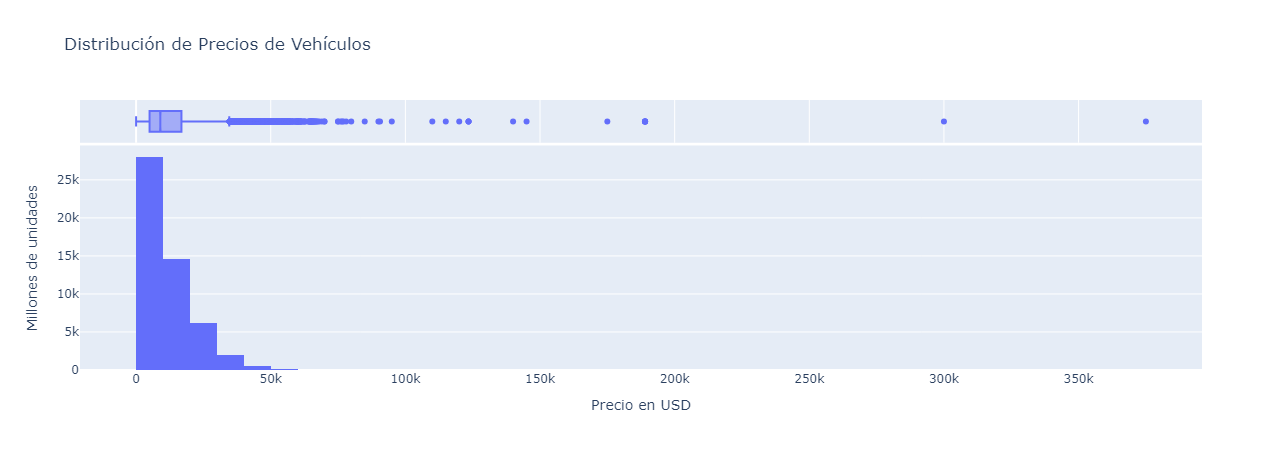

In [9]:
fig_price_distribution = px.histogram(df_vehicles,
                                      x = "price",
                                      nbins = 50,
                                      title = "Distribución de Precios de Vehículos",
                                      marginal = "box")

fig_price_distribution.update_layout(xaxis_title = "Precio en USD" , yaxis_title = "Millones de unidades")
# fig_price_distribution.show()  # Desafortunadamente, no Jupyter no permite gráficos interactivos en GitHub. 
Image("price_distribution.png") # Se muestra imagen del gráfico anterior para que en GitHub se visualice.

### Relación entre Kilometraje y Precio

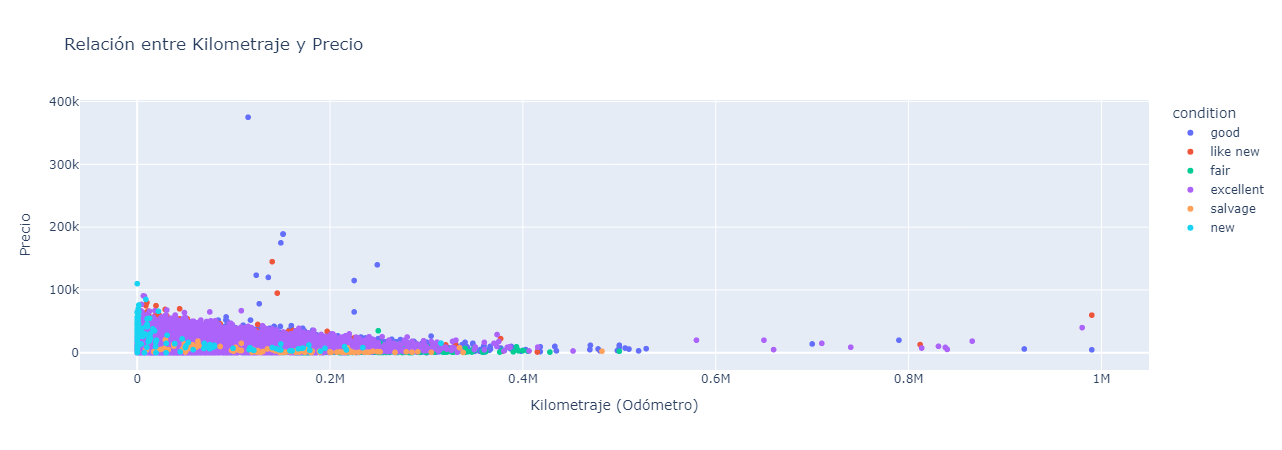

In [10]:
fig_odometer_price = px.scatter(df_vehicles,
                                x = "odometer",
                                y = "price",
                                color = "condition",
                                title = "Relación entre Kilometraje y Precio",
                                labels = {"odometer": "Kilometraje (Odómetro)", "price": "Precio"})

# fig_odometer_price.show()
Image("odometer_price.png")

### Popularidad de Tipo de Vehículos

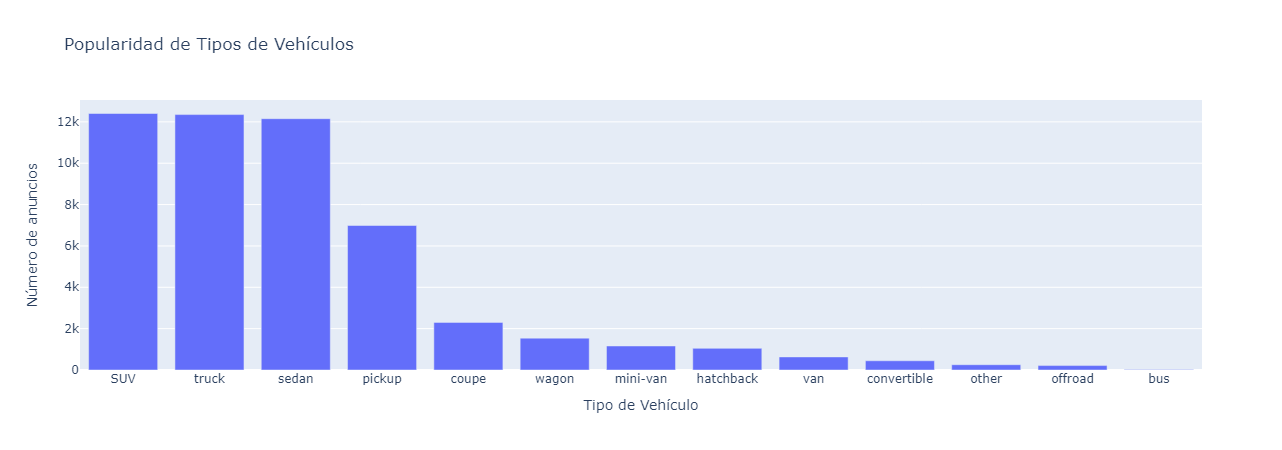

In [22]:
df_vehicles_type = df_vehicles["type"].value_counts().reset_index()

fig_vehicle_types = px.bar(df_vehicles_type,
                           x = "type",
                           y = "count",
                           title = "Popularidad de Tipos de Vehículos",
                           labels = {"type": "Tipo de Vehículo", "count": "Número de anuncios"})

# fig_vehicle_types.show()
Image("vehicles_type.png")

### Duración Primedio en el Mercado por Condición del Vehiculo

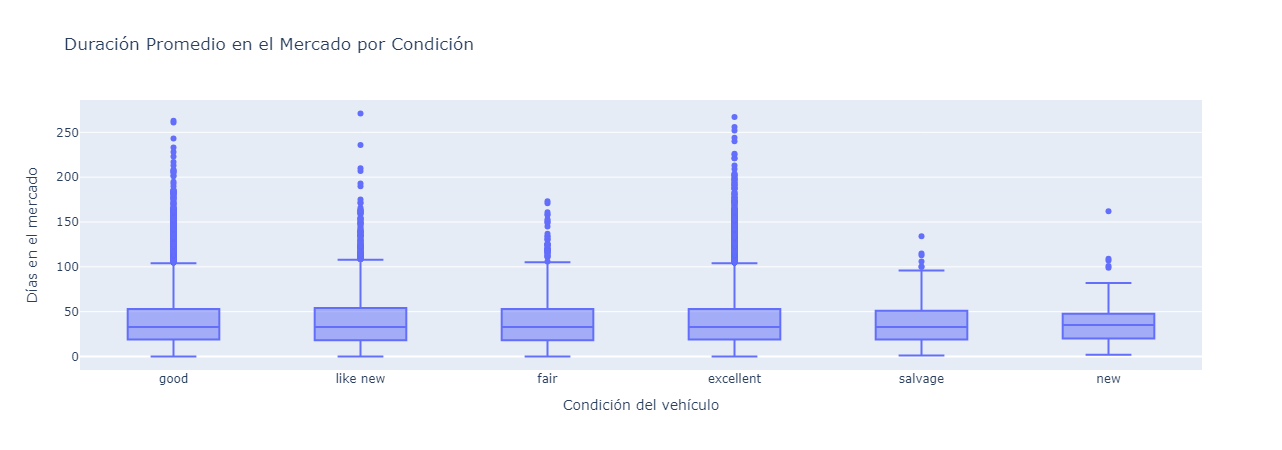

In [27]:
fig_days_condition = px.box(df_vehicles,
                            x = "condition",
                            y = "days_listed",
                            title = "Duración Promedio en el Mercado por Condición",
                            labels = {"condition": "Condición del vehículo", "days_listed": "Días en el mercado"})

# fig_days_condition.show()
Image("days_condition.png")

### Popularidad de Colores de los Vehículos

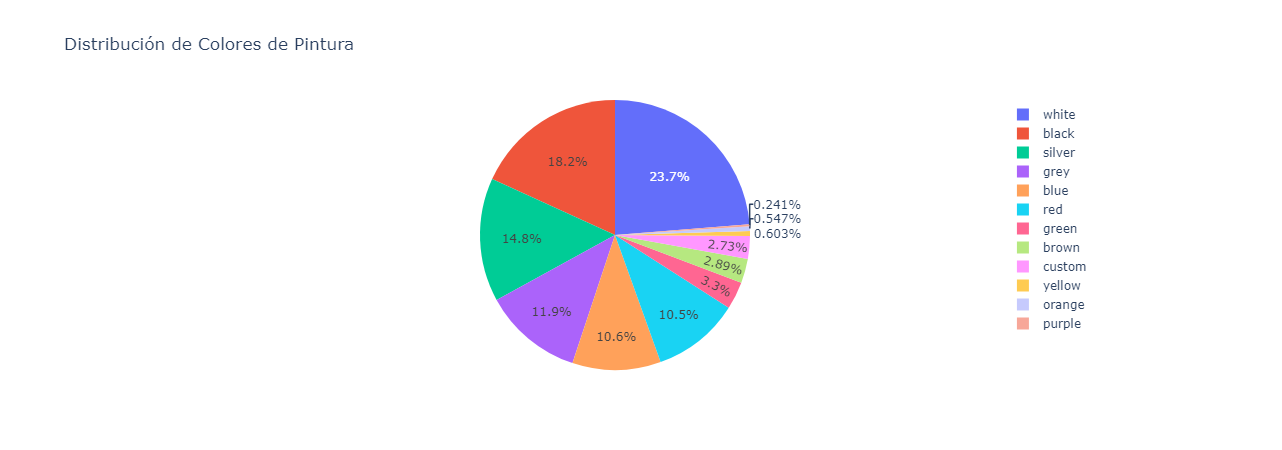

In [34]:
df_paint_color = df_vehicles["paint_color"].value_counts().reset_index()

fig_paint_color = px.pie(df_paint_color,
                         names="paint_color",
                         values="count",
                         title="Distribución de Colores de Pintura",
                         labels={"paint_color": "Color de Pintura", "count": "Frecuencia"})

# fig_paint_color.show()
Image("paint_color.png")